In [91]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=postgres password=student")
cur = conn.cursor()

### How many users are there in location?

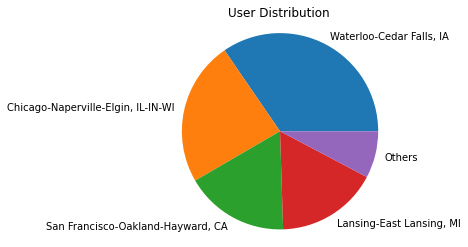

In [94]:
query1 = "select count(user_id) as user_count, location from songplays group by location order by user_count desc"
cur.execute(query1)
results = cur.fetchall()
headers = ["user_count", "location"]
df = pd.DataFrame(results,columns =headers)
negligible_count = df[df.user_count <= 40].count()["user_count"]
df.drop(df[df['user_count'] <= 40].index, inplace = True)
df.loc[len(df.index)] = [negligible_count, "Others"] 
plt.pie(list(df["user_count"]), labels = list(df["location"]))
plt.title('User Distribution')
plt.axis('equal')
plt.show()

### Visualize free vs paid users as per locations

In [95]:
query2 = """select count(level) as free_count, location 
                from songplays 
                where level='free'  
                group by location order by free_count desc
"""

query3 = """select count(level) as paid_count, location 
                from songplays 
                where level='paid'  
                group by location order by paid_count desc
"""

cur.execute(query2)
result_free = cur.fetchall()

cur.execute(query3)
result_paid = cur.fetchall()

free_df = pd.DataFrame(result_free, columns = ["free_count", "location"])
paid_df = pd.DataFrame(result_paid, columns = ["paid_count", "location"])

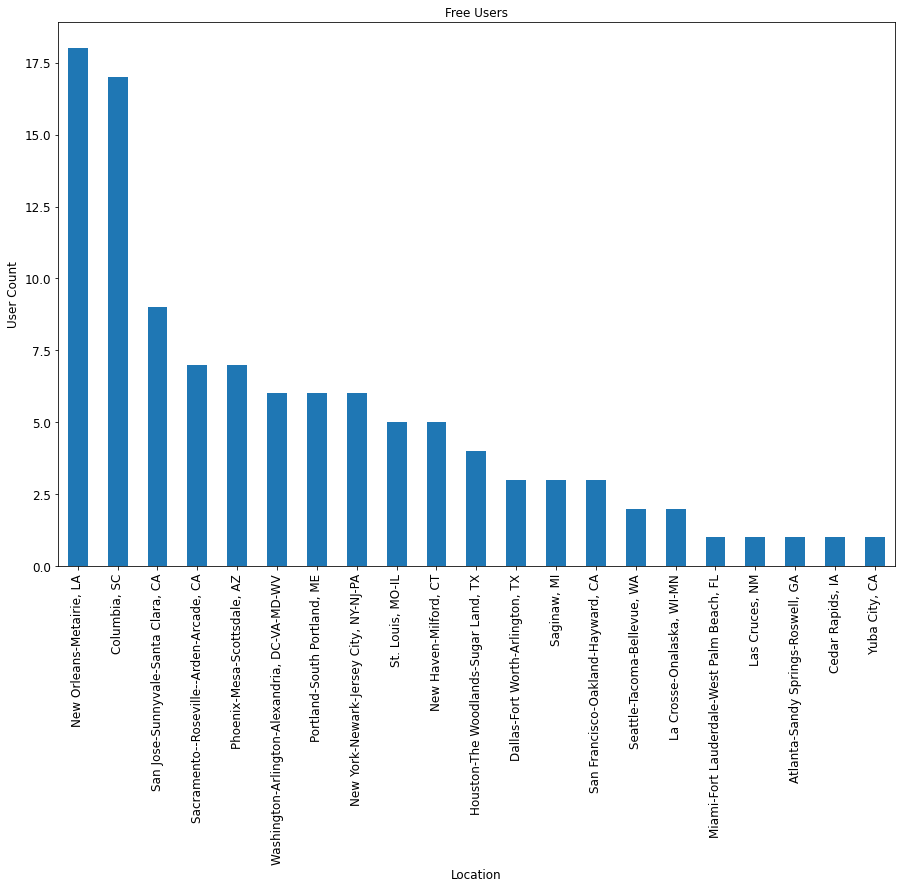

In [96]:
ax = free_df.plot(x="location", y=["free_count"], kind="bar", title ="Free Users", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Location", fontsize=12)
ax.set_ylabel("User Count", fontsize=12)
plt.show()

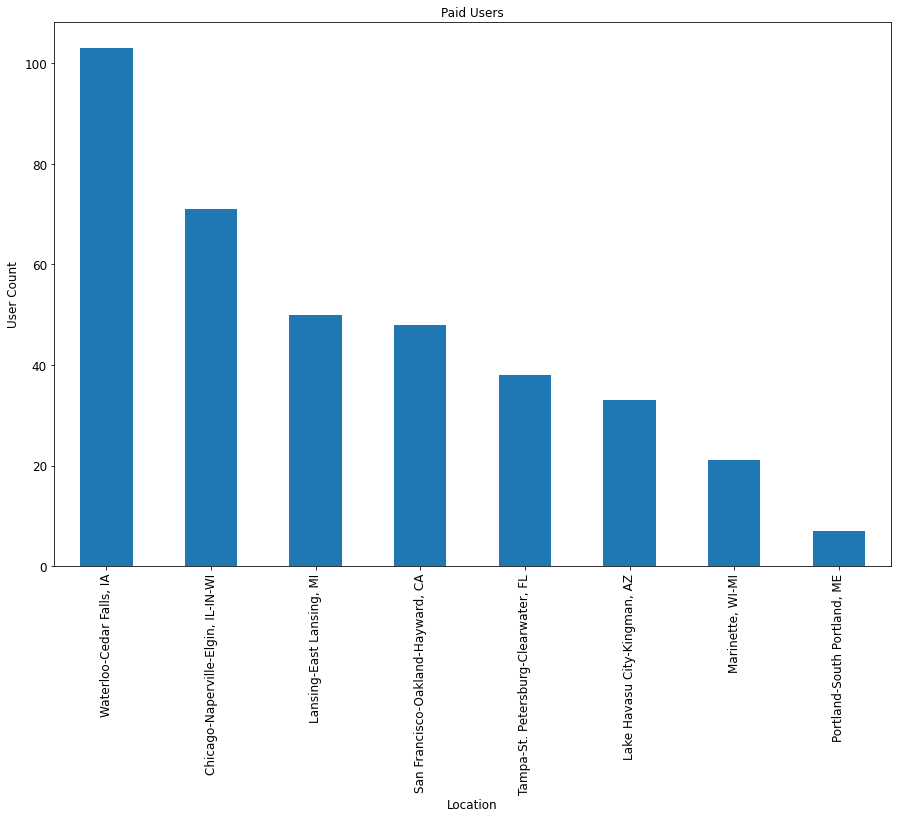

In [97]:
ax = paid_df.plot(x="location", y=["paid_count"], kind="bar", title ="Paid Users", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Location", fontsize=12)
ax.set_ylabel("User Count", fontsize=12)
plt.show()

### Most Popular browser agents

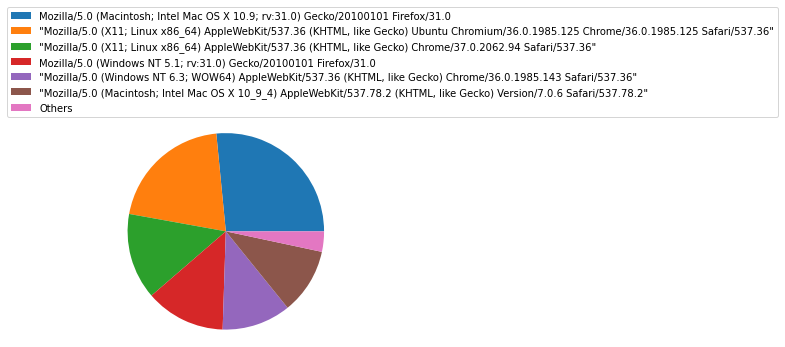

In [98]:
query4 = "select count(user_id) as count, user_agent from songplays group by user_agent order by count desc"
cur.execute(query4)
results = cur.fetchall()

headers = ["user_count", "agent"]
df = pd.DataFrame(results,columns =headers)
negligible_count = df[df.user_count <= 40].count()["user_count"]
df.drop(df[df['user_count'] <= 40].index, inplace = True)
df.loc[len(df.index)] = [negligible_count, "Others"] 
pie =  plt.pie(list(df["user_count"]))
plt.axis('equal')
plt.legend(pie[0], list(df["agent"]), loc="lower center", bbox_to_anchor = (1,1))
plt.show()

In [99]:
conn.close()